In [3]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
from skimage import measure
from skimage.io import imread, imshow
from skimage import img_as_ubyte
from skimage.color import rgb2gray
from skimage.exposure import histogram, cumulative_distribution
from scipy.stats import cauchy, logistic

In [58]:
image = cv2.imread("data/2135041001/front.jpg")
# image = cv2.imread("data/2135041167/front.jpg")
# image = cv2.imread("data/2135041006/front.jpg")
# image = cv2.imread("data/2135041007/front.jpg")
# image = cv2.imread("data/2135041040/front.jpg") 
# image = cv2.imread("data/2135041043/front.jpg") # edges got blended into cases
# image = cv2.imread("data/2135041048/front.jpg") # edges got blended into cases
# image = cv2.imread("data/2135041054/front.jpg")
# image = cv2.imread("data/3718372019/front.jpg")
# image = cv2.imread("data/3734194001/front.jpg")
# image = cv2.imread("data/3761772053/front.jpg") # edges got blended into cases
# image = cv2.imread("data/3788404014/front.jpg")
# image = cv2.imread("data/3798764016/front.jpg") # not found
# image = cv2.imread("data/3821556106/front.jpg") # edges got blended into cases
# image = cv2.imread("data/3824670033/front.jpg") # edges got blended into cases
# image = cv2.imread("data/3838512098/front.jpg") # not found
# image = cv2.imread("data/3865838027/front.jpg") # not found
# image = cv2.imread("data/3871141001/front.jpg") # edges got blended into cases
# image = cv2.imread("data/3836849030/front.jpg") # edges got blended into cases

In [59]:
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# to grayscale image
gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)

# get edges
_, otsu_grad = cv2.threshold(gray,0,255,cv2.THRESH_BINARY + cv2.THRESH_OTSU)

# get contours
contours, _ = cv2.findContours(otsu_grad, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

# image size
height, width = otsu_grad.shape
image_area = height * width

# sort contour index
index_sort = sorted(range(len(contours)), key=lambda i : cv2.contourArea(contours[i]),reverse=True)
contours_sort = [contours[i] for i in index_sort]

# get area and perimeter
contour_peri = [cv2.arcLength(contours_sort[i], True) for i in range(len(index_sort))]
approx = [cv2.approxPolyDP(contours_sort[i], 0.001 * contour_peri[i], True) for i in range(len(index_sort))]
bounding_box = [cv2.boundingRect(approx[i]) for i in range(len(index_sort))]
contour_area = [bounding_box[i][2] * bounding_box[i][3]  for i in range(len(index_sort))]
is_card = list(filter(lambda x : x >= 0, [i if contour_area[i] >= 0.48 * image_area and contour_area[i] <= 0.6 * image_area else -1 for i in range(len(index_sort))]))

is_card_index = is_card[-1]
card_bounding_box = bounding_box[is_card_index]

final = cv2.rectangle(
    image.copy(), 
    (int(card_bounding_box[0]), int(card_bounding_box[1])),
    (int(card_bounding_box[0] + card_bounding_box[2]), int(card_bounding_box[1] + card_bounding_box[3])), 
    (0,255,0), 3
)

IndexError: list index out of range

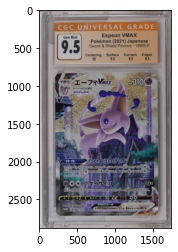

In [45]:
plt.imshow(image)

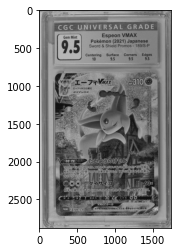

In [47]:
# convert to gray and increase intensity
plt.imshow(gray, cmap = 'gray')

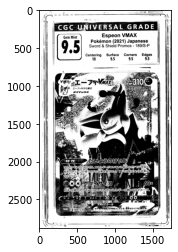

In [48]:
plt.imshow(otsu_grad, cmap = 'gray')

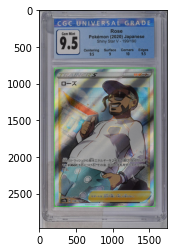

In [55]:
plt.imshow(final)

In [24]:
contour_peri[0]

22529.278677105904

In [27]:
(height + width) * 2

8934

In [43]:
print(contour_area[2] / image_area)

0.029640593230474823


In [30]:
image_area

4682160

In [32]:
contour_area[0]

462485.0